In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/synthetic_covid19_data.csv')
print("✅ Dataset loaded successfully.")
df.head()

✅ Dataset loaded successfully.


,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409


In [4]:
%matplotlib inline

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (3000, 27)

Columns: ['date', 'continent', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests', 'new_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence']

Missing Values:
date                       0
continent                  0
location                   0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
total_tests                0
new_tests                  0
positive_rate              0
tests_per_case             0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
hosp_patients              0
icu_patients               0
reproduction_ra

In [5]:
# 4. Data Cleaning
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Handle missing values
df['total_cases'] = df['total_cases'].fillna(0)
df['total_deaths'] = df['total_deaths'].fillna(0)
df['people_vaccinated'] = df['people_vaccinated'].fillna(0)


In [6]:
# Filter countries
selected_countries = ['USA', 'India', 'Brazil', 'Russia', 'UK']
df = df[df['location'].isin(selected_countries)]

In [15]:
avg_cases = df.groupby('location')['total_cases'].mean().sort_values(ascending=False)
print("Average Total Cases per Country:\n", avg_cases)


Average Total Cases per Country:
 location
Brazil    5.101661e+06
UK        4.984595e+06
USA       4.900431e+06
Russia    4.847214e+06
India     4.812199e+06
Name: total_cases, dtype: float64


In [16]:
df['death_rate'] = df['total_deaths'] / df['total_cases']
avg_death_rate = df.groupby('location')['death_rate'].mean().sort_values(ascending=False)
print("Average Death Rate per Country:\n", avg_death_rate)


Average Death Rate per Country:
 location
USA       0.191839
Brazil    0.158117
India     0.148550
UK        0.128695
Russia    0.127072
Name: death_rate, dtype: float64


In [17]:
df['percent_vaccinated'] = (df['people_fully_vaccinated'] / df['population']) * 100
avg_vaccinated = df.groupby('location')['percent_vaccinated'].mean().sort_values(ascending=False)
print("Average % of Population Fully Vaccinated:\n", avg_vaccinated)


Average % of Population Fully Vaccinated:
 location
UK        24.788622
Russia    20.659511
India     15.014618
Brazil    12.756259
USA        8.906779
Name: percent_vaccinated, dtype: float64


In [18]:
latest_df = df.sort_values('date').groupby('location').last()
print("Total Cases on Latest Date:\n", latest_df['total_cases'].sort_values(ascending=False))


Total Cases on Latest Date:
 location
Russia    9490536
Brazil    9451337
UK        3622138
India     3445376
USA       2704999
Name: total_cases, dtype: int64


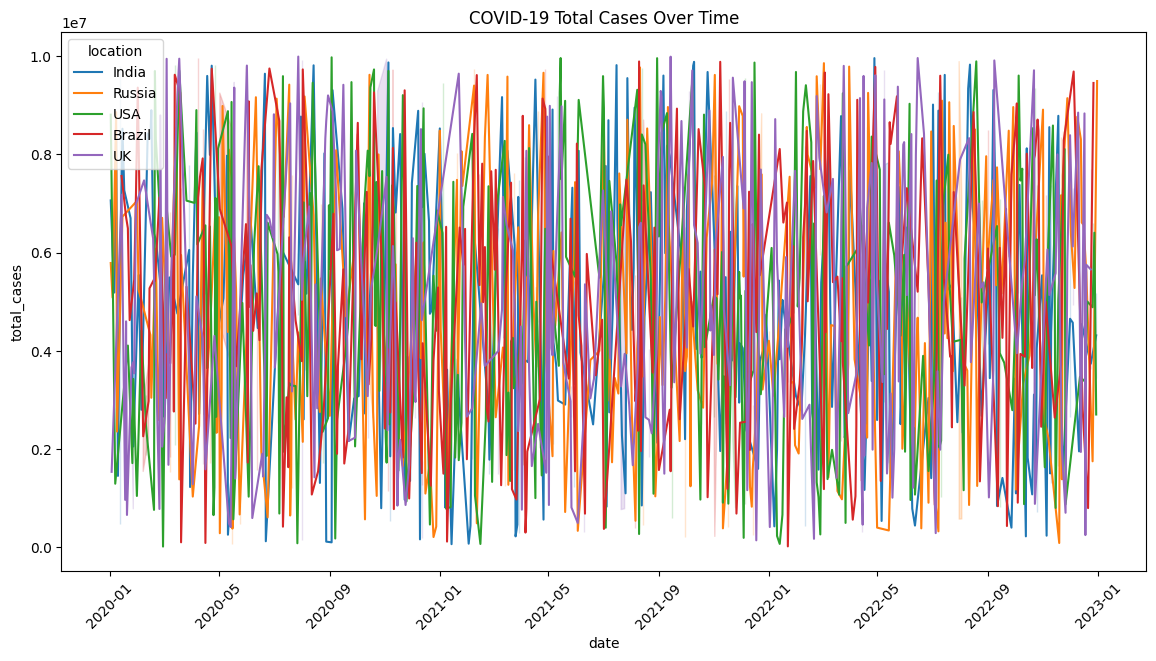

In [7]:
# 5. EDA - Time Series Analysis
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='total_cases', hue='location')
plt.title('COVID-19 Total Cases Over Time')
plt.xticks(rotation=45)
plt.show()

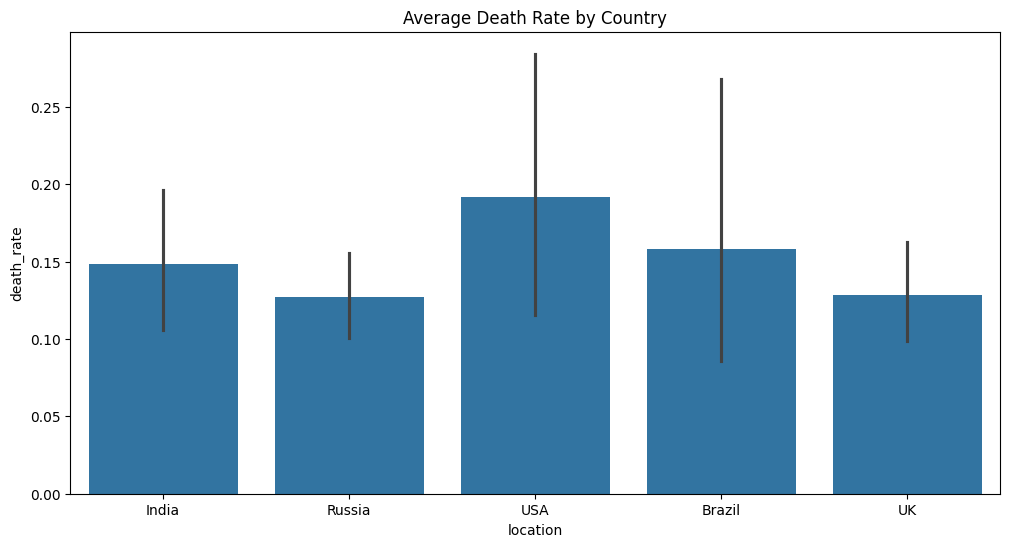

In [8]:
# 6. Death Rate Analysis
df['death_rate'] = df['total_deaths'] / df['total_cases']
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='location', y='death_rate')
plt.title('Average Death Rate by Country')
plt.show()

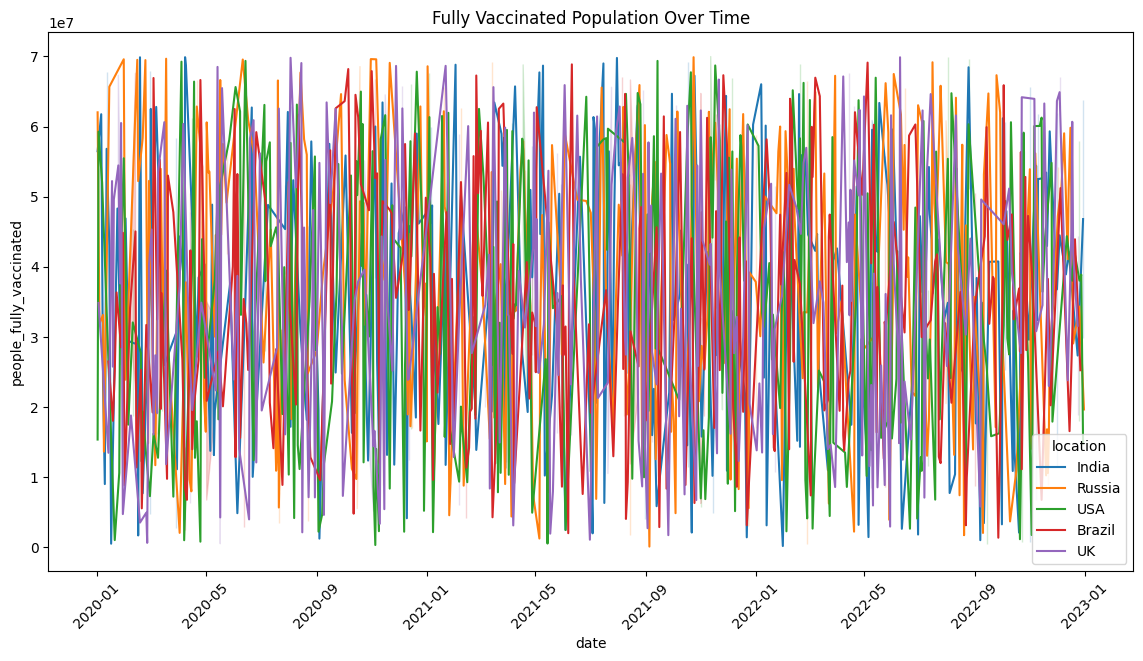

In [9]:
# 7. Vaccination Analysis
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='people_fully_vaccinated', hue='location')
plt.title('Fully Vaccinated Population Over Time')
plt.xticks(rotation=45)
plt.show()

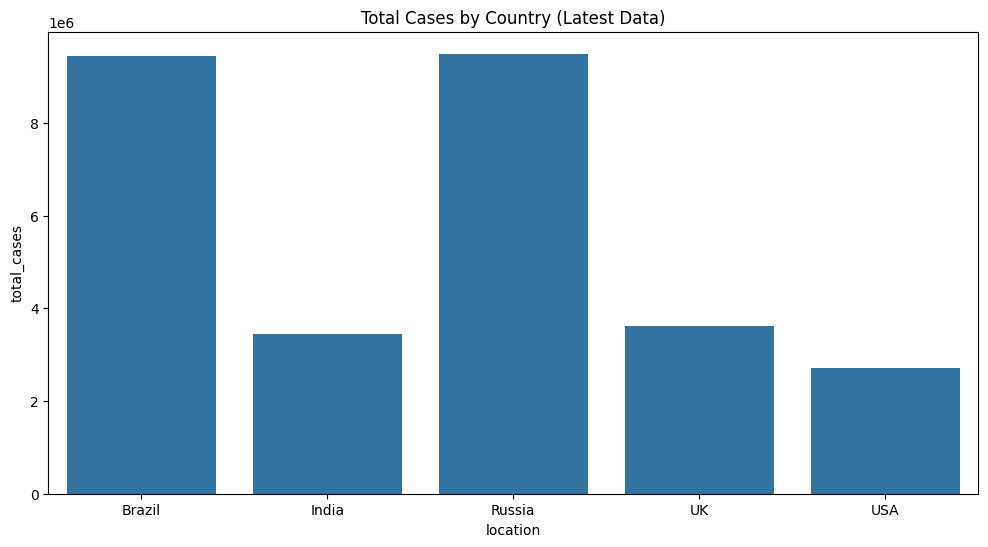

In [10]:
# 8. Recent Status Comparison
latest_data = df.sort_values('date').groupby('location').last().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=latest_data, x='location', y='total_cases')
plt.title('Total Cases by Country (Latest Data)')
plt.show()

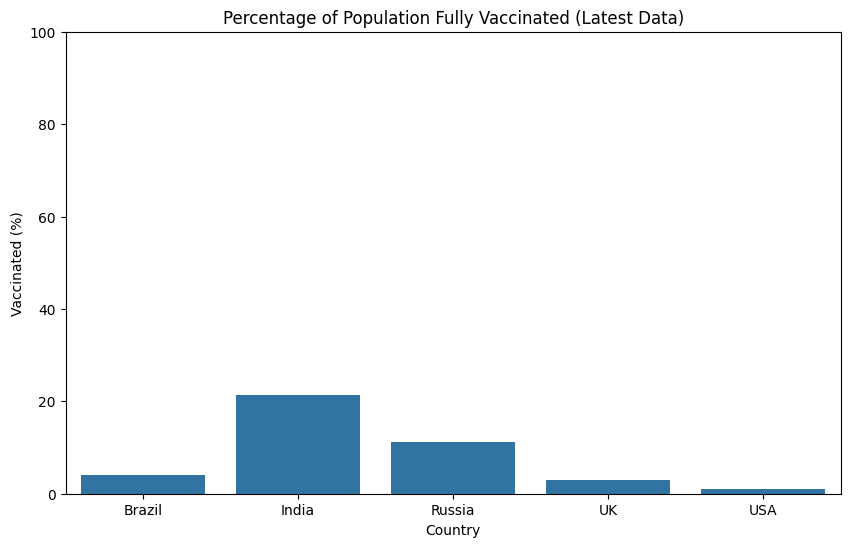

In [11]:
# Calculate percent vaccinated (fully vaccinated / population)
latest_data['percent_vaccinated'] = (latest_data['people_fully_vaccinated'] / latest_data['population']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=latest_data, x='location', y='percent_vaccinated')
plt.title('Percentage of Population Fully Vaccinated (Latest Data)')
plt.ylabel('Vaccinated (%)')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.show()


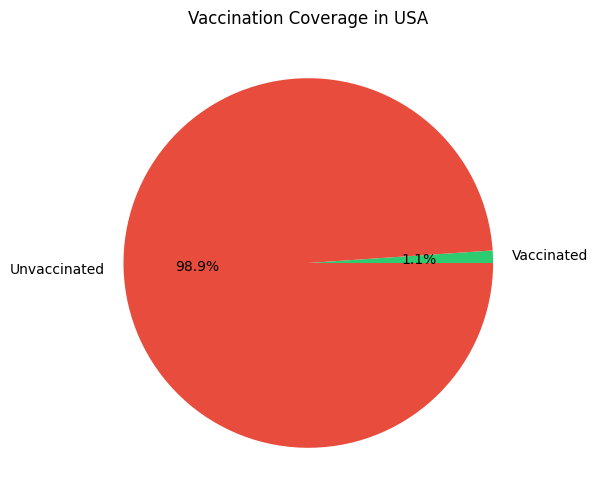

In [12]:
country = 'USA'
row = latest_data[latest_data['location'] == country].iloc[0]
vaccinated = row['people_fully_vaccinated']
unvaccinated = row['population'] - vaccinated

plt.figure(figsize=(6,6))
plt.pie([vaccinated, unvaccinated], labels=['Vaccinated', 'Unvaccinated'], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
plt.title(f'Vaccination Coverage in {country}')
plt.show()


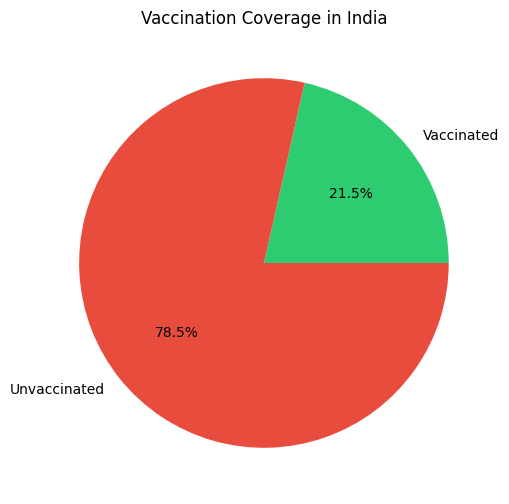

In [13]:
country = 'India'
row = latest_data[latest_data['location'] == country].iloc[0]
vaccinated = row['people_fully_vaccinated']
unvaccinated = row['population'] - vaccinated

plt.figure(figsize=(6,6))
plt.pie([vaccinated, unvaccinated], labels=['Vaccinated', 'Unvaccinated'], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
plt.title(f'Vaccination Coverage in {country}')
plt.show()


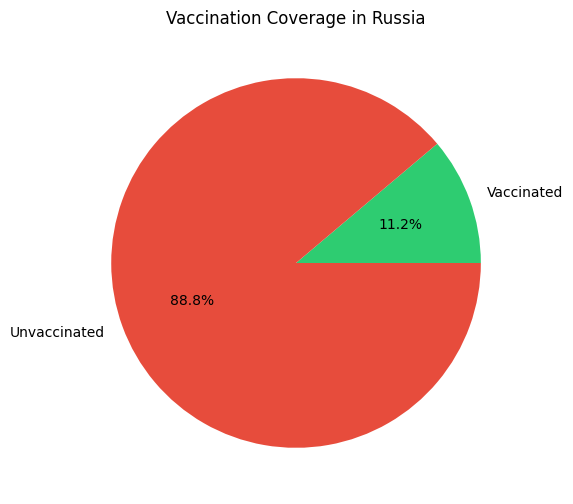

In [14]:
country = 'Russia'
row = latest_data[latest_data['location'] == country].iloc[0]
vaccinated = row['people_fully_vaccinated']
unvaccinated = row['population'] - vaccinated

plt.figure(figsize=(6,6))
plt.pie([vaccinated, unvaccinated], labels=['Vaccinated', 'Unvaccinated'], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
plt.title(f'Vaccination Coverage in {country}')
plt.show()


In [19]:
!pip install plotly


In [20]:
import plotly.express as px

# Use latest data
choropleth_df = df.sort_values('date').groupby('location').last().reset_index()

fig = px.choropleth(
    choropleth_df,
    locations="location",
    locationmode="country names",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title="Total COVID-19 Cases by Country (Latest Date)"
)

fig.show()
